### Neural Networks with PyTorch
Deep learning networks has more number of hidden layers and hence the term "deep" learning. You can build one of these deep neural networks using only weights matrices. 
Pytorch has a very nice module nn that gives a nice way to efficiently build large neural networks

In [3]:
## import all necessary packages
import torch
import numpy as np
import helper
import matplotlib.pyplot as plt


In [4]:
# In this chapter We are going to build a fully connected network larged than the one we did
# Identifying text in an image, in this one we will identify the letters in an image(grayscale) which consists of handwritten 
# digits. Each image is 28 x 28 pixels

### Goal - Identify the digits in the image using a neural network. 

First we need the data set to work with. In this case we are going to use MNIST dataset through torchvision package. 

In [9]:
### run this cell

from torchvision import datasets, transforms

# Define a transfrom to normalize the data
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,), (0.5,)),
                               ])
trainset = datasets.MNIST('~/.PyTorchChallenge/MNIST_data/', train=True, transform=transform, download=True)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

print("Success")

Success


Trainset is responsible for downloading the data set from the internet with the above transform which means datas are normalize with mean of 0.5 and standard deviation of 0.5

Trainloader loads the images from the dataset with a batch size of 64 and shuffled. Batch size is the number of images we get in one iteration from the dataloader and pass through our network. when shuffle is set to true - Means the the batch shuffle with each iterations. 

In [10]:
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


Display one of the images

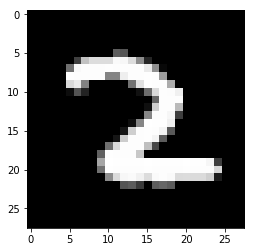

In [14]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

Example - Lets try to build a simple network for this dataset using weight matrices and matrix multiplications.
1. Input to each layer must be one dimensional vector that can be stacked into a 2D tensor as a batch of multiple examples.
2. Images are 28 x 28 2D tensors, so we need to convert them into 1D vectors i.e flatten them.
3. Convert the batches of images with shape(64, 1, 28, 28) to have a shape of(64, 784) 784 means  28 times 28 which is the image size basically flattening them into 1D vectors
4. Here we need 10 output units meaning one for each digit.  We want our network to predict the digit shown in an image. 
5. We will calculate probabilities that the image is any one digit or calss. 
6. This ends up being a discrete probability distribution over the classes or digits that tells us the most likely class for the image. 
7. In summary we need 10 output units for the 10 classes.


In [36]:
## solution to finding the output
# first i have to get the images
# images are flattened with the below command
def activation(x):
    return 1/(1 + torch.exp(-x))

## 2 methods to do that
#inputs = images.reshape(images.shape[0] * images.shape[1], images.shape[2] * images.shape[3])

inputs = images.view(images.shape[0], -1)

w1 = torch.randn(784, 256)
w2 = torch.randn(256, 10)

b1 = torch.randn(256)
b2 = torch.randn(10)

hidden = activation(torch.mm(inputs, w1) + b1)
output = activation(torch.mm(output1, w2) + b2)

print("success")

success


### Now we have to define the probabilities 
We have 10 outputs for our network. We will pass in an image into the network and get out a probability distribution over the classes that tells us the likely classes the images belong to.

In [52]:
# define softmax distribution
# note - about view -- (-1,1) ==> . column shapes is defined by 1 but -1 is automatically decided by the numerator term
def softmax(x):
    den_sum = torch.sum(torch.exp(x), dim=1).view(-1, 1)
    
    return torch.exp(x)/(den_sum)

probabilities = softmax(output)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


### Building networks with Pytorch

In [ ]:
Pytorch provides a module nn that makes building networks much simpler. 

In [ ]:
from torch import nn

In [ ]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer linear transformation
        self.hidden = nn.Linear(784, 256)
        
        # Output Layer, 10 units - One for each digit
        self.output = nn.Linear(256, 10)
        
        # define sigmoid activation and softmax output
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim = 1)
    
    def forward(self, x):
        # Pass the input tensor throught each of our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x